In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [2]:
import multiprocessing
from joblib import Parallel, delayed

import pywt
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency 

In [3]:
from scipy.optimize import curve_fit
import CoreFunctions as cf
import platform

In [4]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/data10/dchendrickson01/SmallCopy/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Comrooputer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [5]:
file = rootfolder + '2 Laser readout fan on.csv'

DataSet = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)

In [6]:
DataSet = DataSet[:,3:7]

In [7]:
np.shape(DataSet)

(100000, 4)

In [8]:
FullFP = cf.getThumbprint(DataSet[:,1], 'haar')

In [9]:
FullFP.shape

(500, 100000)

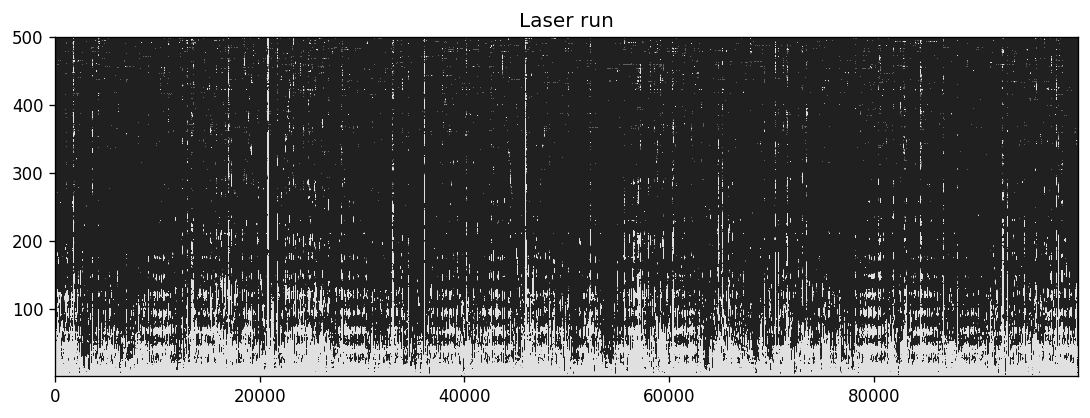

In [12]:
h = cf.PlotFingerPrint([FullFP,'Laser run'])

In [13]:
DataSet = DataSet.T
length = np.shape(DataSet)[0]
justifier = np.ones((length, np.shape(DataSet)[1]))
average = np.zeros(length)
for i in range(length):
    average[i]= np.average(DataSet[i][:])
justifier = justifier.T * average.T
DataSet = DataSet - justifier.T

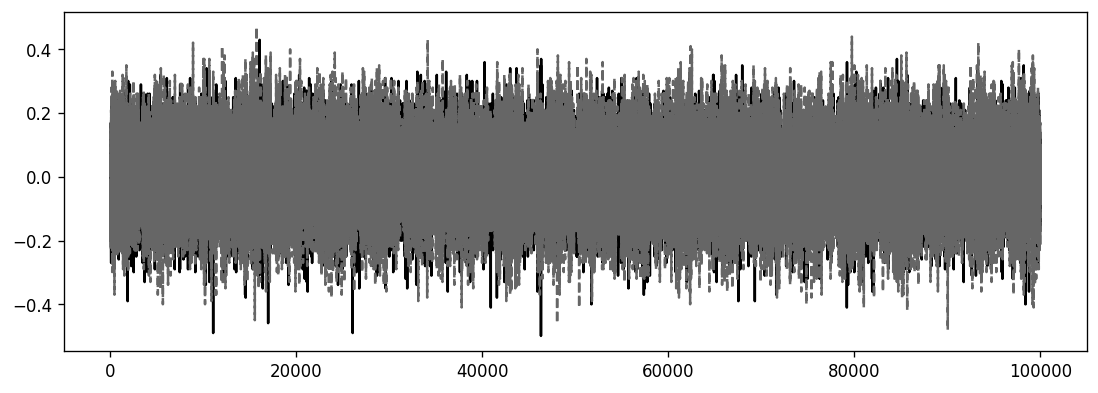

In [14]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(DataSet[0,:])
plt.plot(DataSet[1,:])
plt.plot(DataSet[2,:])
plt.plot(DataSet[3,:])
plt.show()

In [15]:
for i in range(np.shape(DataSet)[0]):
    DataSet[i,:]=cf.KalmanFilterDenoise(DataSet[i,:])

/sciclone/home20/dchendrickson01/.conda/envs/testenv2/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [16]:
fp = cf.getThumbprint([DataSet[3,:],'db5'], 'db4', 1000, 10)

/sciclone/home20/dchendrickson01/.conda/envs/testenv2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


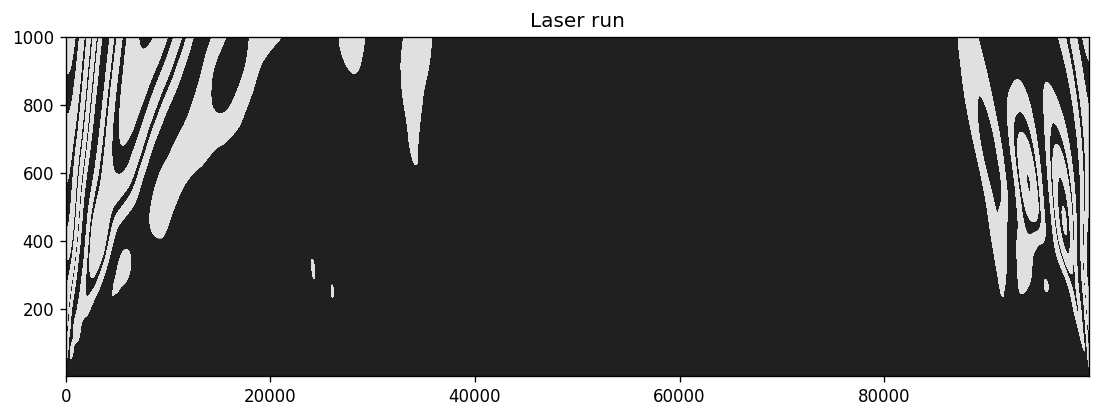

In [17]:
h = cf.PlotFingerPrint([fp,'Laser run'])

In [18]:
fp = cf.getThumbprint([DataSet[2,:],'db5'], 'db4', 1000, 10)

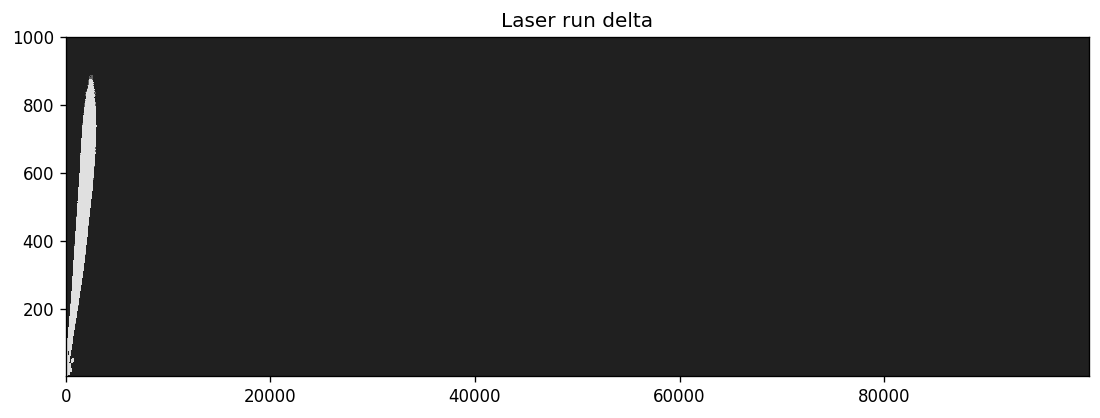

In [19]:
h = cf.PlotFingerPrint([fp,'Laser run delta'])